# Logistic Regression 

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data = 'assignment_08_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
number_data = data.shape[0]

point_x = data[:, 0]
point_y = data[:, 1]
label   = data[:, 2]

print('number of data = ', number_data)
print('data type of point x = ', point_x.dtype)
print('data type of point y = ', point_y.dtype)

point_x_class_0 = point_x[label == 0]
point_y_class_0 = point_y[label == 0]

point_x_class_1 = point_x[label == 1]
point_y_class_1 = point_y[label == 1]

number of data =  600
data type of point x =  float64
data type of point y =  float64


## plot the data

In [4]:
print(point_x_class_0[:5])
print(point_x_class_1[:5])
print('point_x_class_0 shape :',point_x_class_0.shape)
print('point_x_class_1 shape :',point_x_class_1.shape)
print('point_y_class_0 shape :',point_y_class_0.shape)
print('point_y_class_1 shape :',point_y_class_1.shape)

[11.87317438  1.87060812 -7.00588728 -1.08523343  0.66429781]
[10.53665352  2.08147367 17.88985149 14.42962497 11.81850944]
point_x_class_0 shape : (300,)
point_x_class_1 shape : (300,)
point_y_class_0 shape : (300,)
point_y_class_1 shape : (300,)


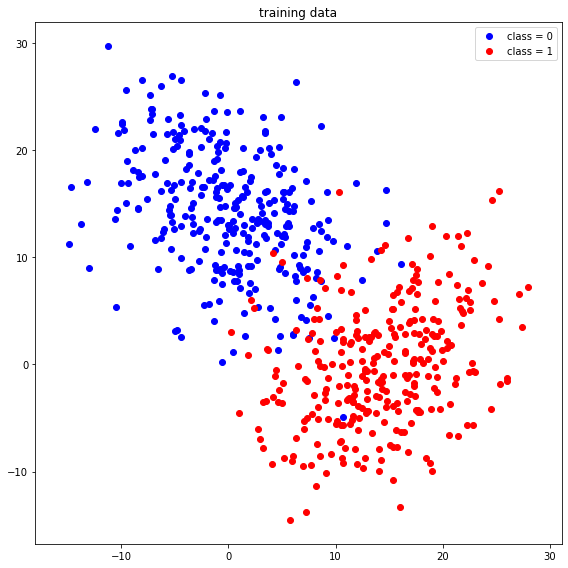

In [5]:
f = plt.figure(figsize=(8,8))   

plt.title('training data')
plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \theta_2)$
- point = $(1, x, y) \in \mathbb{R}^3$

In [6]:
testx = point_x[:5]
testy = point_y[:5]
ones = np.ones((len(testx),))
print('testx :',testx)
print('testy :',testy)

res = np.stack([ones,testx,testy],1)
print(res)

testx : [11.87317438  1.87060812 -7.00588728 -1.08523343  0.66429781]
testy : [16.93648772 11.51533802 21.47132405 16.42436766 10.68937976]
[[ 1.         11.87317438 16.93648772]
 [ 1.          1.87060812 11.51533802]
 [ 1.         -7.00588728 21.47132405]
 [ 1.         -1.08523343 16.42436766]
 [ 1.          0.66429781 10.68937976]]


In [8]:
def compute_linear_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = np.dot(point,theta)
    #value = value.reshape((2,1))
    # if theta.shape !=point.shape:
    #     print("Raise Error not same in shape, from comput_linear_regression")
    #     return 0
    # elif len(point.shape)!=3:
    #     print("point.shape is not (1,x,y) from compute_linear_regression")
    # else:
    #     return value
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [16]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = 1 / (1+np.exp(-z))
    #value = sigmoid(z)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point = $(1, x, y) \in \mathbb{R}^3$

In [17]:
def compute_logistic_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    linear_prediction = compute_linear_regression(theta,point)

    value = 1 /(1+np.exp(-linear_prediction))
    value_ = sigmoid(linear_prediction)
    return value_
    

## define the residual function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (x, y) \in \mathbb{R}^2$
- label $= l \in \{0, 1\}$

In [19]:
point = np.array([2,4])

point = np.append(np.ones((1,)),point)
point

array([1., 2., 4.])

In [20]:
input1  = np.array([0.1, 0.2, 0.3])
input2  = np.array([[1, 2, 3], [1, -2, -3]])
input3  = np.array([0, 1])

In [34]:
def compute_residual(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # if len(point.shape)==2:
    #     #print('log in compute_residual : the length of point is ')
    #     point = np.append(np.ones((1,)),point)
    
    #print('shape of point : ',point.shape)
    logistic_regression = compute_logistic_regression(theta,point)
    #print('logistic_regression resulted from compute_logistic_regression :',logistic_regression)
    # print('logistic_regression shape resulted from compute_logistic_regression :',logistic_regression.shape)
    # print('label :',label)
    # print('label shape :',label.shape)
    #RHS1 = -label * np.log(logistic_regression)
    #RHS2 = (1-label)*np.log(1-logistic_regression)
    # print(np.log(logistic_regression))
    # print(label * np.log(logistic_regression))
    # print(np.log(1-logistic_regression))
    # print((1-label))
    residual = (label * np.log(logistic_regression)) + ((1-label)*np.log(1-logistic_regression))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

In [128]:
def function_result_03():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([0, 1])

    value = compute_residual(input1, input2, input3)

    # print("value result : ",value)
    # print("value result shape :",value.shape)
    return value
res = function_result_03()


## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [36]:
def compute_loss(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = point.shape[0]
    residual = compute_residual(theta,point,label)
    
    
    
    loss = (-1/n * np.sum(residual,axis=0))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [129]:
def compute_gradient(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #선형 회귀 함수 정의
    linear_regression = compute_linear_regression(theta,point)
    #시그모이드 씌우기 
    logistic_regression = compute_logistic_regression(theta,point)
    # print('linear regression :',linear_regression)
    
    n = point.shape[0]
    
    
    
    # print('logistic_regression :',logistic_regression)
    # print('label : ',label)
    # print('object :',(logistic_regression - label))
    # print('object shape :',(logistic_regression - label).shape)
    # print('point :',point[:,1])
    


    #gradient = (1 / n) * np.sum( np.dot((logistic_regression - label),point[0][1]))
    gradient = (1 / n) * np.sum((logistic_regression - label)*point[:,1])
    #print(gradient)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## initialize the gradient descent algorithm

In [232]:
num_iteration   = 50000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
number=1
theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

number_point_class_0    = len(point_x_class_0)
number_point_class_1    = len(point_x_class_1)

point_class_0   = np.ones((number_point_class_0, 3))
point_class_1   = np.ones((number_point_class_1, 3))

point_class_0[:, 1] = point_x_class_0
point_class_0[:, 2] = point_y_class_0
 
point_class_1[:, 1] = point_x_class_1
point_class_1[:, 2] = point_y_class_1

label_0     = np.zeros(number_point_class_0)
label_1     = np.ones(number_point_class_1)

point = np.concatenate((point_class_0, point_class_1), axis=0)
label = np.concatenate((label_0, label_1), axis=0)

# print('shape of point_class_0 : ', point_class_0.shape)
# print('shape of point_class_1 : ', point_class_1.shape)
# print('shape of label_0 : ', label_0.shape)
# print('shape of label_1 : ', label_1.shape)

# print('shape of point : ', point.shape)
# print('shape of label : ', label.shape)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [233]:
for i in range(num_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    
    theta   = theta - learning_rate * compute_gradient(theta,point,label)
    loss    = compute_loss(theta,point,label)
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    theta_iteration[i, :]   = theta
    loss_iteration[i]       = loss

theta_optimal = theta

<ipython-input-34-afa6dd5cb1e1>:22: RuntimeWarning: divide by zero encountered in log
  residual = (label * np.log(logistic_regression)) + ((1-label)*np.log(1-logistic_regression))
<ipython-input-34-afa6dd5cb1e1>:22: RuntimeWarning: invalid value encountered in multiply
  residual = (label * np.log(logistic_regression)) + ((1-label)*np.log(1-logistic_regression))


___

___

## functions for presenting the results

___

___

In [234]:
def function_result_01():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_linear_regression(input1, input2)
    
    print(value)

In [235]:
def function_result_02():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_logistic_regression(input1, input2)

    print(value)

In [236]:
def function_result_03():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([0, 1])

    value = compute_residual(input1, input2, input3)

    print(value)

In [237]:
def function_result_04():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_loss(input1, input2, input3)

    print(value)

In [238]:
def function_result_05():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_gradient(input1, input2, input3)

    print(value)

In [239]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [240]:
def function_result_07():
    
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    plt.plot(theta_iteration[:, 0], '-', color='red', label=r'$\theta_0$')
    plt.plot(theta_iteration[:, 1], '-', color='green', label=r'$\theta_1$')
    plt.plot(theta_iteration[:, 2], '-', color='blue', label=r'$\theta_2$')
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

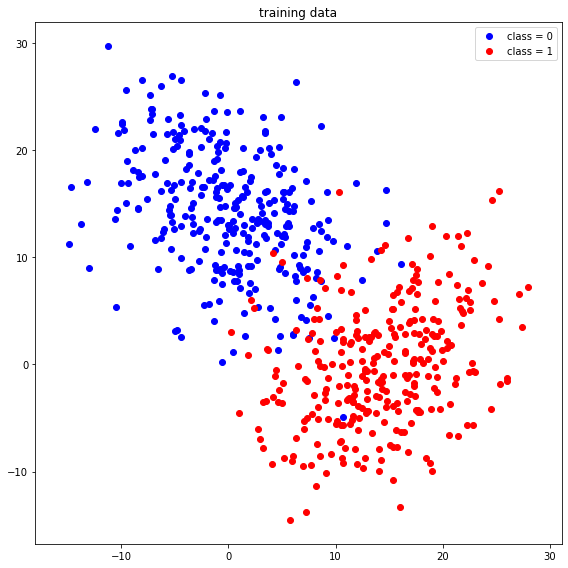

In [241]:
f = plt.figure(figsize=(8,8))   

plt.title('training data')
plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

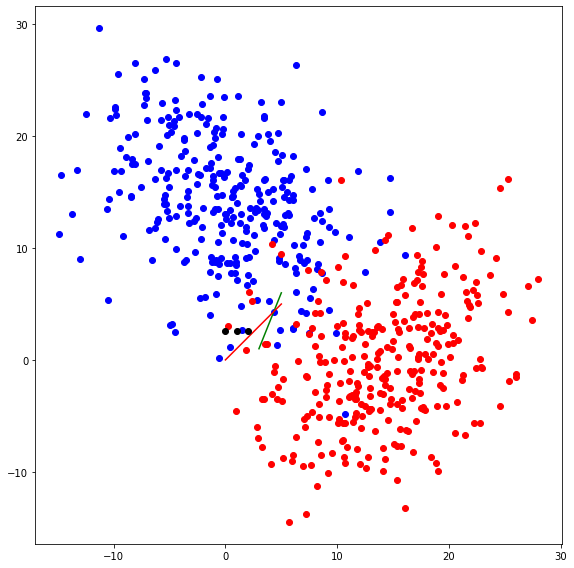

In [242]:
plt.figure(figsize=(8,8))
X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

[XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')
plt.plot([3, 5], [1, 6],color="green")
plt.plot([0, 5], [0, 5],color="red")

plt.axis('equal')
plt.tight_layout()
plt.plot(theta,'o',color='black')

In [243]:
def function_result_08():
    plt.figure(figsize=(8,8))
    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
    plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

## plot the logistic regression values over the 2-dimensional Euclidean space

In [244]:
def function_result_09():
    plt.figure(figsize=(8,8))
    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
[ 1.4 -1.2]
**************************************************
## [RESULT 02]
**************************************************
[0.80218389 0.23147522]
**************************************************
## [RESULT 03]
**************************************************
[-1.62041741 -1.46328247]
**************************************************
## [RESULT 04]
**************************************************
[0.92041741 0.86328247]
**************************************************
## [RESULT 05]
**************************************************
1.1414173441151987
**************************************************
## [RESULT 06]
**************************************************


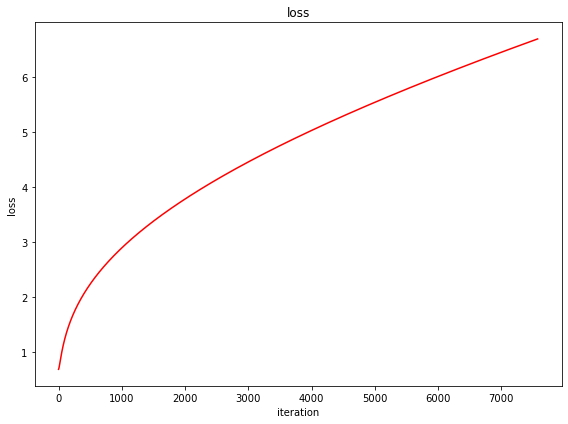

**************************************************
## [RESULT 07]
**************************************************


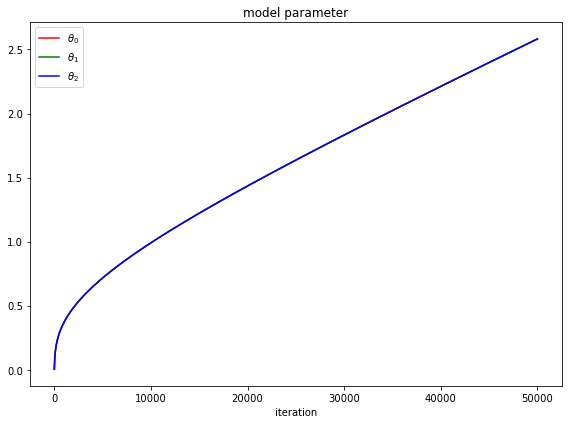

**************************************************
## [RESULT 08]
**************************************************


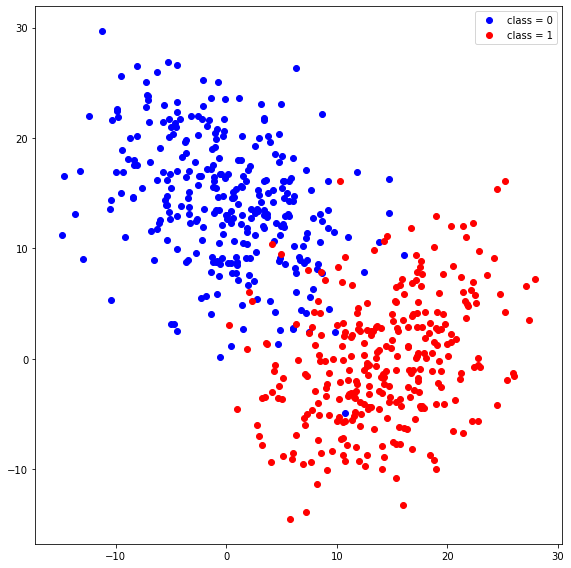

**************************************************
## [RESULT 09]
**************************************************


<Figure size 576x576 with 0 Axes>

In [245]:
number_result = 9

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)